In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx


In [5]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")
vaccini = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv")
guariti = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv")
popolazione = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")


#1. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid

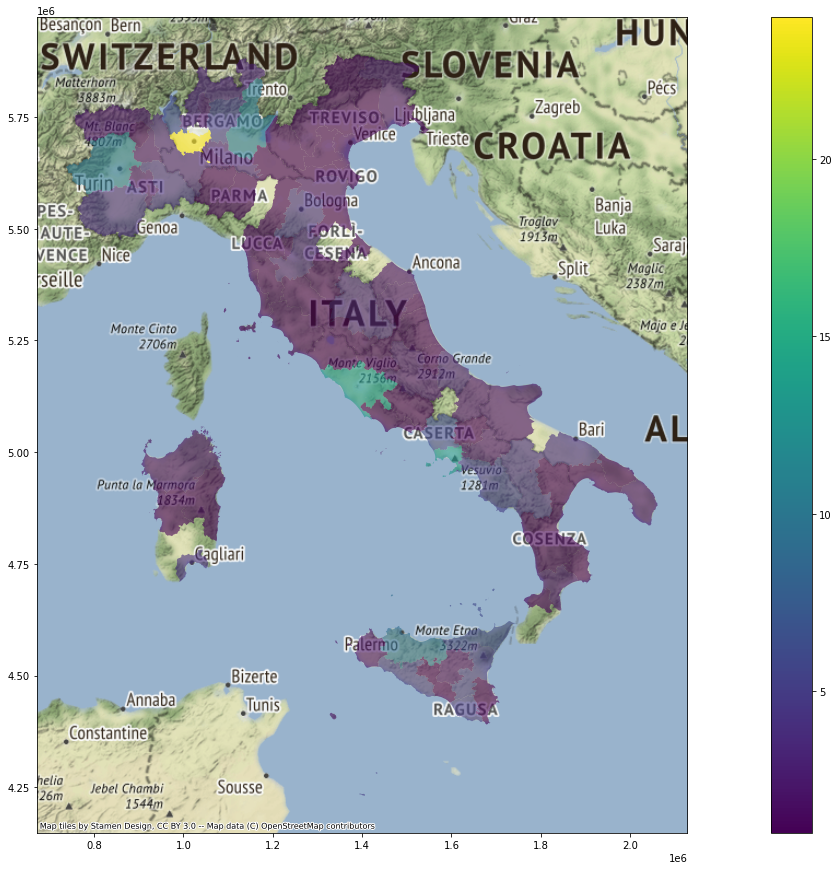

In [7]:
province["DEN_UTS"] = province["DEN_UTS"].str.upper()
numero_presidi = vaccini.groupby("provincia", as_index = False)[["presidio_ospedaliero"]].count()
vaccini_province = pd.merge(province, numero_presidi, how = "outer", left_on = "DEN_UTS", right_on = "provincia")

ax = vaccini_province.to_crs(epsg=3857).plot(figsize = (30,15), column = "presidio_ospedaliero",  legend = True, alpha = 0.6)
ctx.add_basemap(ax)

#2. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione

In [9]:
guariti = guariti.groupby("nome_area", as_index = False)[["totale_guariti"]].sum()
popolazione = popolazione.groupby("nome_area", as_index = False)[["totale_popolazione"]].sum()
pop_guariti = pd.merge(popolazione, guariti, how = "outer", on = "nome_area")
pop_guariti["percentuale_guariti"] = (pop_guariti["totale_guariti"] / pop_guariti["totale_popolazione"]) * 100
regioni_percentuale = pd.merge(regioni, pop_guariti, how = "outer", left_on = "DEN_REG", right_on = "nome_area")
ax = regioni_percentuale.to_crs(epsg=37857).plot(figsize = (30,15), column = "percentuale_guariti",  legend = True, alpha = 0.8)
ctx.add_basemap(ax)

ValueError: ignored

# una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se l apercentuale di vaccinati è superiore alla media

In [ ]:
vaccinati = vaccinati.groupby("nome_area", as_index = False)[["prima_dose"]].sum()
media = vaccinati["prima_dose"].mean()
regioni_vaccinati = pd.merge(vaccinati, regioni, how = "outer", left_on = "nome_area", right_on = "DEN_REG")
regioni_vaccinati